# AND merge target and indicator

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../data/BTCUSDT-minute-target-tpsl.csv")
# Temporary solution
import sys
sys.path.insert(0, '..')
import useful_functions as uf
import target as target

In [77]:
len(df)

1988738

In [41]:
# Import indicators
from ta.volatility import UlcerIndex
from ta.momentum import StochasticOscillator
from ta.trend import CCIIndicator
from ta.trend import SMAIndicator

In [80]:
# ui = UlcerIndex(df.close, window=100)
# df["ui"] = ui.ulcer_index()

# i = StochasticOscillator(df.close, df.high, df.low, 54, 9)
# df["sr"] = i.stoch_signal()

# i = CCIIndicator(df.high, df.low, df.close, window=70)
# df["cci"] = i.cci()

i = SMAIndicator(df.close, window=100) #50
sma_50_rate = uf.get_rate(i.sma_indicator())
df["sma"] = list(map(lambda x: uf.log_abs(x*100, zeros=True), sma_50_rate))

In [72]:
d = df[-5000:-2000]

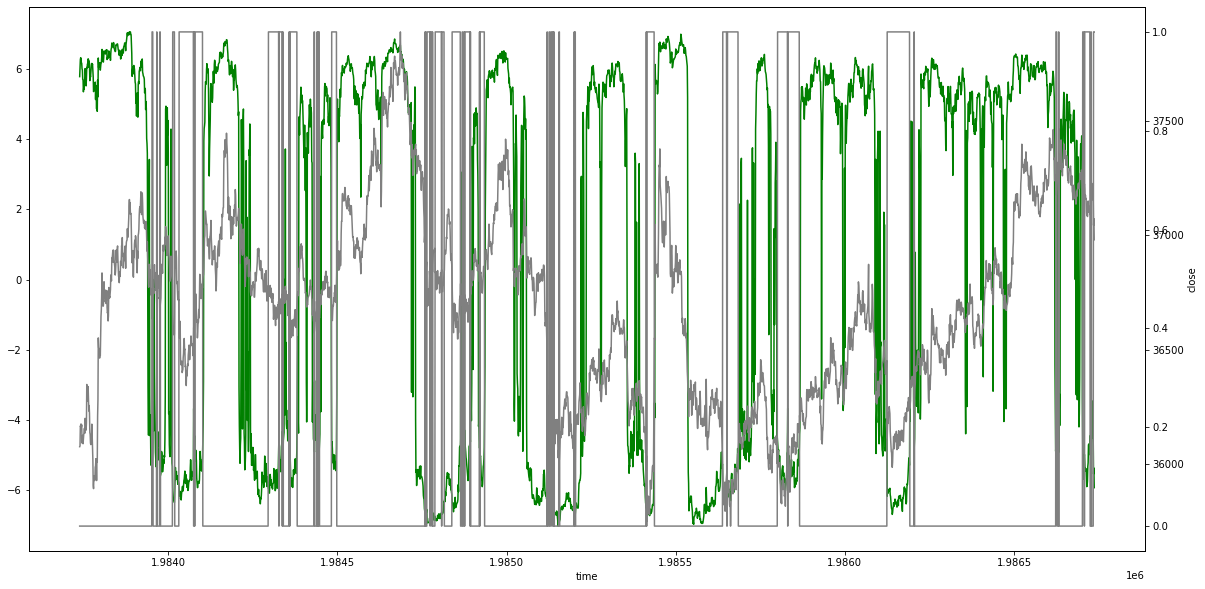

In [73]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(d.sma,
        color="green")
ax.set_xlabel("time")
# ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(d.close,
         color="gray")

ax3=ax.twinx()
ax3.plot(d.target,
         color="gray")


ax2.set_ylabel("close")
plt.show()

(array([  5364., 105692., 320136., 384996., 116776., 144496., 371651.,
        392099., 138959.,   8469.]),
 array([-8.99066455, -7.21699962, -5.44333469, -3.66966976, -1.89600483,
        -0.12233989,  1.65132504,  3.42498997,  5.1986549 ,  6.97231983,
         8.74598476]),
 <BarContainer object of 10 artists>)

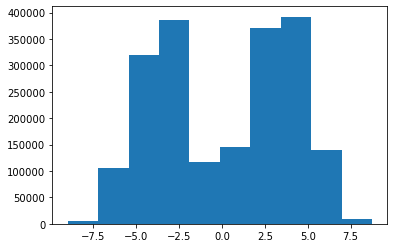

In [74]:
plt.hist(df["sma"])

In [78]:
df["target_base"] = df.target
df.target_base.value_counts(), df.target_base.value_counts()[1]/df.target_base.value_counts()[0]

(0.0    1558927
 1.0     429510
 Name: target_base, dtype: int64,
 0.27551642892835904)

In [81]:
# df["atr_classified"] = uf.classify(df.ui, 0.5)
# df.atr_classified.value_counts(), df.atr_classified.value_counts()[1]/df.atr_classified.value_counts()[0]

df["i_classified"] = uf.classify(list(map(lambda x: -x, df.sma)), 0.01)
df.i_classified.value_counts(), df.i_classified.value_counts()[1]/df.i_classified.value_counts()[0]

(0    1052698
 1     936040
 Name: i_classified, dtype: int64,
 0.8891818926225755)

In [82]:
df["target"] = target.zip_target(df.target_base, df.i_classified)
df.target.value_counts(), df.target.value_counts()[1]/df.target.value_counts()[0]

(0.0    1789233
 1.0     199505
 Name: target, dtype: int64,
 0.11150308540028045)

In [83]:
d = df[1850000:1860000]

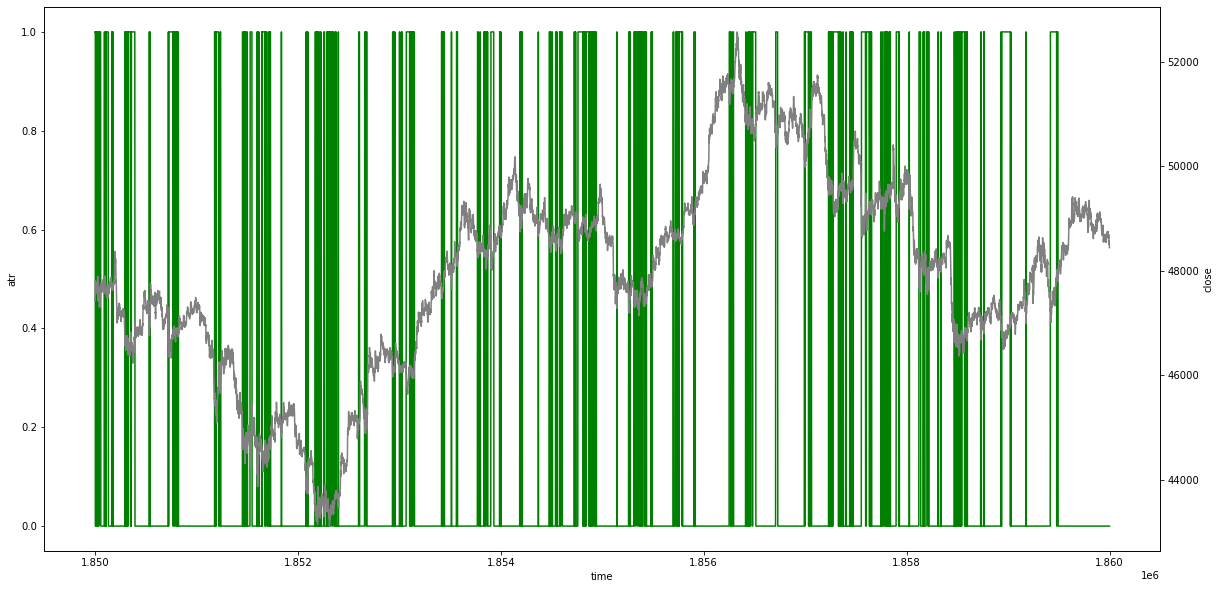

In [84]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(d.target,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(d.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

In [85]:
df.to_csv("../data/BTCUSDT-minute-target-ui.csv", index=False) #Default